# Question 1

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
def sinc(x):
    if x==0:
        f=1
    else:
        f=np.sin(x)/x
    return f

In [5]:
x_min=-50
x_max=50
n=151
delta=(x_max-x_min)/(n-1)
x=np.linspace(x_min,x_max,n)

In [6]:
f_x=[ sinc(i) for i in x]

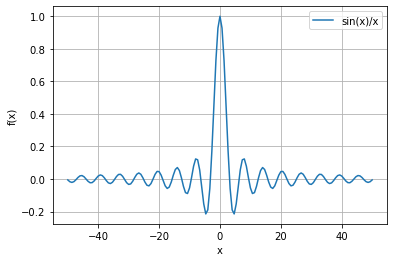

In [7]:
plt.plot(x,f_x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend(["sin(x)/x"])

In [12]:
DFT=np.fft.fft(f_x,norm='ortho')
DFT=np.fft.fftshift(DFT)
k_library= np.fft.fftfreq(n,delta)
k_library= np.fft.fftshift(k_library)
kq_list=2*np.pi*k_library
coeff=delta*np.sqrt(n/(2*np.pi))
k_coeff=np.exp(-1j*kq_list*x_min)
f_k=coeff*k_coeff*DFT

In [13]:
def analytical_Fourier_sinc(k_array):
    l=len(k_array)
    result = np.zeros(l)  
    result[(k_array > -1) & (k_array < 1)] = np.sqrt(np.pi / 2) 
    return result

In [14]:
#Analytical Solution:  Fourier transform of sinc
FT_actual = analytical_Fourier_sinc(kq_list)

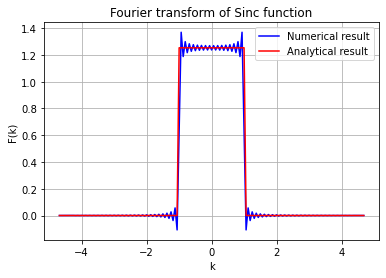

In [15]:
plt.plot(kq_list,f_k.real,color="b",label = "Numerical result")
plt.plot(kq_list,FT_actual,color="r",label = 'Analytical result')
plt.xlabel('k')
plt.ylabel('F(k)')
plt.title("Fourier transform of Sinc function")
plt.legend()
plt.grid()

# Question 5

In [84]:
 def DFT_matrix(n):
    w=np.exp(-1j*2*np.pi/n)
    DFT=np.zeros([n,n])
    for p in range(n):
        for q in range(n):
            DFT[p][q]=w**(p*q)
    return DFT

In [200]:
def f_array(n):
    f=np.zeros(n)
    import random as ran
    for i in range(n):
        f[i]=i
    return f

In [215]:
n_list=[]
time1=[] #Time spend without using FFT
time2=[] #Time spend with using FFT
for i in range(4,101):
    n=i
    time_spend1=0.0
    time_spend2=0.0
    while(time_spend1==0.0 or time_spend2==0.0):
        f_x=f_array(n)
        
        # DFT without FFT
        start_time=time.time()
        DFT=(1/np.sqrt(n))*np.matmul(DFT_matrix(n),f_x)
        time_spend1=time.time()-start_time

        #DFT using FFT
        start_time=time.time()
        FFT=np.fft.fft(f_x,norm='ortho')
        time_spend2=time.time()-start_time
    
    n_list.append(n)
    time1.append(time_spend1)
    time2.append(time_spend2)
    #print(time_spend1,time_spend2)

C:\Users\HP\AppData\Local\Temp/ipykernel_27584/2649266790.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  DFT[p][q]=w**(p*q)


Text(0, 0.5, 'Computation time')

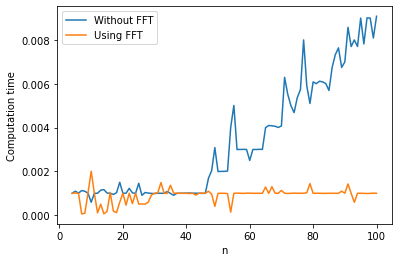

In [219]:
plt.plot(n_list,time1,label="Without FFT")
plt.plot(n_list,time2,label="Using FFT")
plt.legend()
plt.xlabel("n")
plt.ylabel("Computation time")

# Question 6

In [221]:
def Constant(x):
    f=1
    return f

In [230]:
x_min=-50
x_max=50
n=1001
delta=(x_max-x_min)/(n-1)
x=np.linspace(x_min,x_max,n)

In [231]:
f_x=[ Constant(i) for i in x]

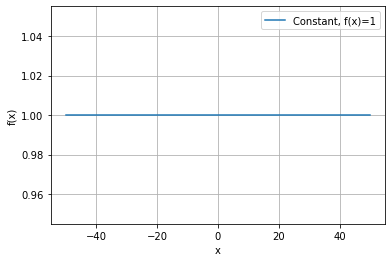

In [232]:
plt.plot(x,f_x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend(["Constant, f(x)=1"])

In [233]:
DFT=np.fft.fft(f_x,norm='ortho')
DFT=np.fft.fftshift(DFT)
k_library= np.fft.fftfreq(n,delta)
k_library= np.fft.fftshift(k_library)
kq_list=2*np.pi*k_library
coeff=delta*np.sqrt(n/(2*np.pi))
k_coeff=np.exp(-1j*kq_list*x_min)
f_k=coeff*k_coeff*DFT

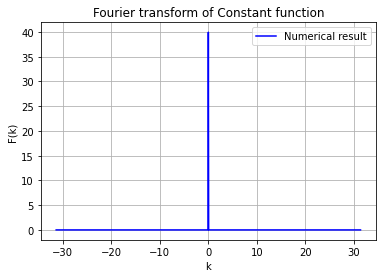

In [234]:
plt.plot(kq_list,f_k.real,color="b",label = "Numerical result")
plt.xlabel('k')
plt.ylabel('F(k)')
plt.title("Fourier transform of Constant function")
plt.legend()
plt.grid()

# Question 10

In [506]:
def Gaussian(x,y):
    f=np.exp(-(x**2+y**2))
    return f

In [507]:
x_min=-50
x_max=50
n=1001
delta=(x_max-x_min)/(n-1)
x=np.linspace(x_min,x_max,n)
y=x.copy()

In [508]:
f_x=[[ Gaussian(i,j) for j in y] for i in x]

In [517]:
DFT=np.fft.fft2(f_x,norm='ortho')
DFT=np.fft.fftshift(DFT)
k_library= np.fft.fftfreq(n,delta)
k_library= np.fft.fftshift(k_library)
kq_list=2*np.pi*k_library
kx=kq_list.copy()
ky=kx=kq_list.copy()
#k-points meshgrid
KX,KY=np.meshgrid(kx,ky)

coeff=delta*np.sqrt(n/(2*np.pi))

FFT=[[ coeff*np.exp(-1j*(kq_list[i]+kq_list[j])*x_min)*DFT[i][j]  for j in range(n)] for i in range(n)]

FFT=np.array(FFT)

In [518]:
def analytical_Fourier_Gaussian(kx,ky):
    l1=len(kx)
    l2=len(ky)
    result=np.zeros((l1,l2))
    for i in range(l1):
        for j in range(l2):
            result[i][j]= 0.5*np.exp(-(kx[i]**2+ky[j]**2)/4)
    return result

In [519]:
#Analytical Solution:  Fourier transform of Gaussian
FT_actual = analytical_Fourier_Gaussian(kx,ky)

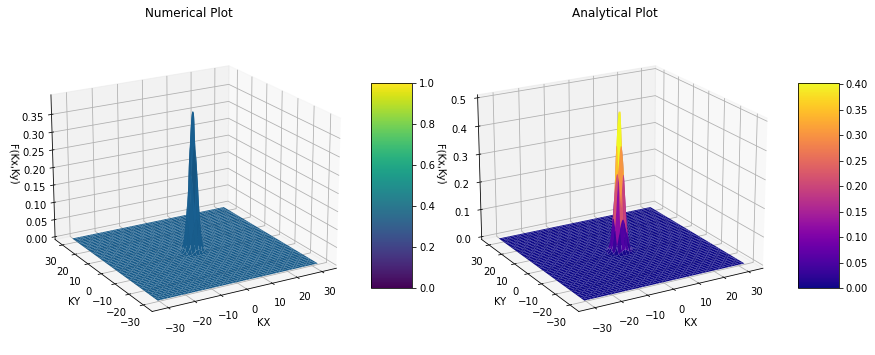

In [534]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the figure size
fig = plt.figure(figsize=(12, 6))

# Create two subplots
ax1 = fig.add_subplot(121, projection='3d')  # First subplot on the left
ax2 = fig.add_subplot(122, projection='3d')  # Second subplot on the right

# Plot the surface on the first subplot
surf1 = ax1.plot_surface(KX, KY, FFT)
ax1.set_xlabel('KX')
ax1.set_ylabel('KY')
ax1.set_zlabel('F(Kx,Ky)')
ax1.set_title('Numerical Plot')

# Plot the surface on the second subplot
surf2 = ax2.plot_surface(KX, KY, FT_actual, cmap='plasma', edgecolor='none')  # Using a different colormap
ax2.set_xlabel('KX')
ax2.set_ylabel('KY')
ax2.set_zlabel('F(Kx,Ky)')
ax2.set_title('Analytical Plot')

# Adjusting the viewing angle for better visualization (optional)
ax1.view_init(20, 240)  # Change the angle as needed
ax2.view_init(20, 240)  # Change the angle as needed

# Add color bars to show the mapping of colors to values
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# Question 11

In [457]:
def box_function(x):
    if(x>-1 and x<1):
        f=1
    else:
        f=0
    return f

In [458]:
x_min=-5
x_max=5
n=100
delta=(x_max-x_min)/(n-1)
x=np.linspace(x_min,x_max,n)

In [459]:
f_x=[ box_function(i) for i in x]
f_x_pad=np.pad(f_x,(0,len(f_x)),mode="constant")

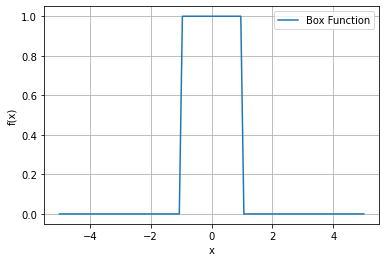

In [460]:
plt.plot(x,f_x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend(["Box Function"])

In [461]:
DFT=np.fft.fft(f_x_pad,norm='ortho')

In [462]:
Convo_k=DFT*DFT

In [463]:
IDFT=np.fft.ifft(Convo_k,norm='ortho').real

In [466]:
convo_x=delta*np.sqrt(n)*IDFT
convo_final=convo_x[int((n)/2):int(-n/2)]

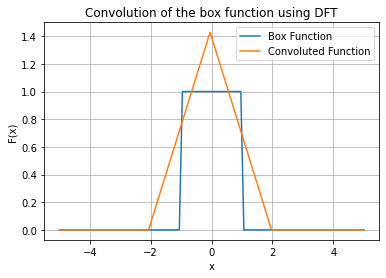

In [467]:
plt.plot(x,f_x,label="Box Function")
plt.plot(x,convo_final,label="Convoluted Function")
plt.xlabel('x')
plt.ylabel("F(x)")
plt.title("Convolution of the box function using DFT")
plt.legend()
plt.grid()

# Question 12

In [456]:
def g(x):
    g=np.exp(-x*x)
    return g
def h(x):
    h=np.exp(-4*x*x)
    return h

In [410]:
x_min=-5
x_max=5
n=100
delta=(x_max-x_min)/(n-1)
x=np.linspace(x_min,x_max,n)

In [411]:
g_x=[ g(i) for i in x]
g_x_pad=np.pad(g_x,(0,len(g_x)),mode="constant")

h_x=[ h(i) for i in x]
h_x_pad=np.pad(h_x,(0,len(h_x)),mode="constant")

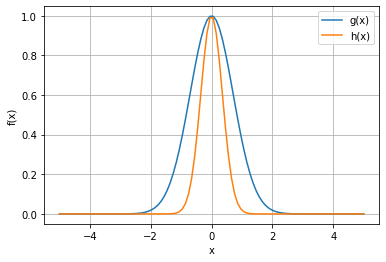

In [413]:
plt.plot(x,g_x,label="g(x)")
plt.plot(x,h_x,label="h(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()

In [414]:
DFT_g=np.fft.fft(g_x_pad,norm='ortho')
DFT_h=np.fft.fft(h_x_pad,norm='ortho')

In [415]:
Convo_k=DFT_g*DFT_h

In [416]:
IDFT=np.fft.ifft(Convo_k,norm='ortho').real

In [450]:
convo_x=delta*np.sqrt(2*n)*IDFT
convo_Numerical=convo_x[int((n)/2):int(-n/2)]

In [451]:
def analytical_FT_Convo(x):
    result=np.sqrt(np.pi/5)*np.exp(-0.8*x**2)
    return result

In [452]:
Convo_actual=[ analytical_FT_Convo(i) for i in x]

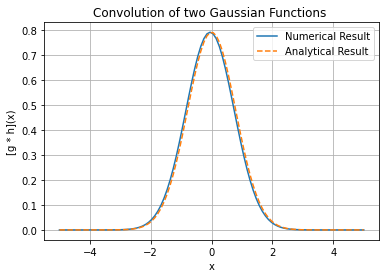

In [453]:
plt.plot(x,convo_Numerical,label="Numerical Result")
plt.plot(x,Convo_actual,"--",label="Analytical Result")
plt.xlabel('x')
plt.ylabel("[g * h](x)")
plt.title("Convolution of two Gaussian Functions ")
plt.legend()
plt.grid()

# Question 13

In [624]:
#data=np.loadtxt('Data_CP3.txt')
url = "http://theory.tifr.res.in/~kulkarni/noise.txt"
response = requests.get(url)
data = np.array([float(x) for x in response.text.strip().split('\n')])

In [625]:
l=len(data)
n_list=[i for i in range(l)]

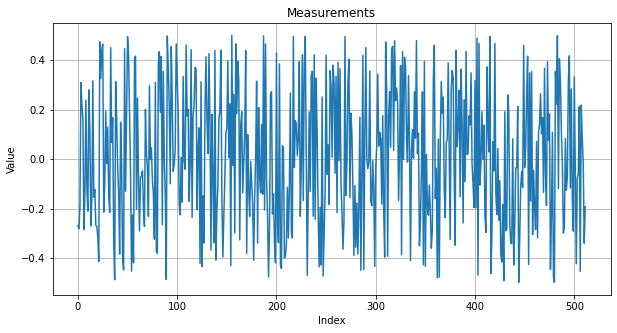

In [626]:
plt.figure(figsize=(10, 5))
plt.plot(data ,marker='', linestyle='-', markersize=5)
plt.title('Measurements')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [627]:
DFT=np.fft.fft(data,norm='ortho')
#DFT=np.fft.fftshift(data)
k_points=2*np.pi*np.fft.fftfreq(l,1)
#k_ponts=2*np.pi*np.fft.fftshift(k_points)

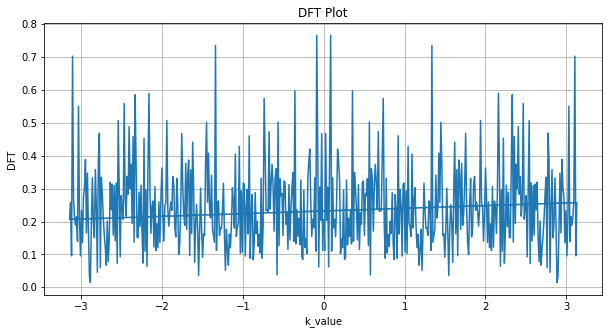

In [628]:
plt.figure(figsize=(10, 5))
plt.plot(k_points,np.abs(DFT) ,marker='', linestyle='-', markersize=5)
plt.title('DFT Plot')
plt.xlabel('k_value')
plt.ylabel('DFT')
plt.grid(True)
plt.show()

In [629]:
Power_spectrum=[np.sqrt(l/(2*np.pi))*np.abs(DFT[i])**2 for i in range(l)]
Power_spectrum=np.array(Power_spectrum)

In [630]:
Power_spectrum_norm=Power_spectrum/l

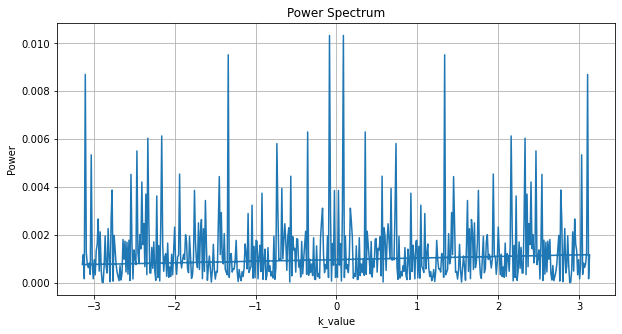

In [631]:
plt.figure(figsize=(10, 5))
plt.plot(k_points,Power_spectrum_norm,marker='', linestyle='-', markersize=5)
plt.title('Power Spectrum')
plt.xlabel('k_value')
plt.ylabel('Power')
plt.grid(True)
plt.show()

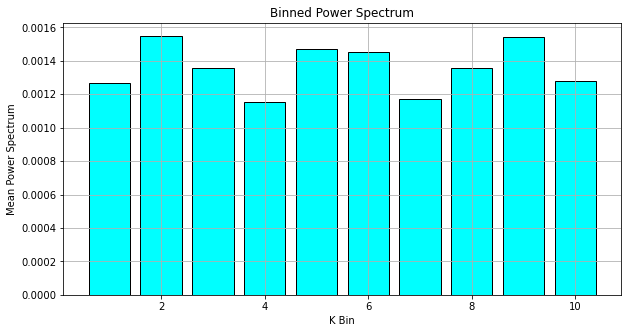

In [637]:
# Binning the power spectrum into ten k bins
num_bins = 10
bin_edges = np.linspace(np.min(k_points), np.max(k_points), num_bins + 1)
bin_indices = np.digitize(k_points, bin_edges)
binned_power_spectrum = np.zeros(num_bins)

for i in range(num_bins):
    indices_in_bin = np.where(bin_indices == i+1)[0]
    binned_power_spectrum[i] = np.mean(Power_spectrum_norm[indices_in_bin])

# Plotting the binned power spectrum
plt.figure(figsize=(10, 5))
plt.bar(range(1, num_bins + 1), binned_power_spectrum, color='cyan', edgecolor='black')
plt.title('Binned Power Spectrum')
plt.xlabel('K Bin')
plt.ylabel('Mean Power Spectrum')
plt.grid(True)
plt.show()

In [645]:
# Cut out all frequency components those have power <0.0065
for i in range(l):
    if Power_spectrum_norm[i]<0.0065:
        DFT[i]=0

In [646]:
IDFT=np.fft.ifft(DFT)

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


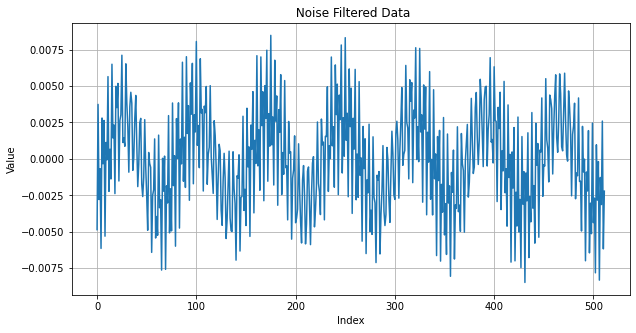

In [654]:
plt.figure(figsize=(10, 5))
plt.plot(IDFT ,marker='', linestyle='-', markersize=5)
plt.title(' Noise Filtered Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()